### Faster hyperrectangular overapproximation of the linear map of a polytopic set

In [1]:
using LazySets, Plots

┌ Info: Recompiling stale cache file /Users/forets/.julia/compiled/v1.1/LazySets/NjrGc.ji for LazySets [b4f0291d-fe17-52bc-9479-3d1a343d9043]
└ @ Base loading.jl:1184


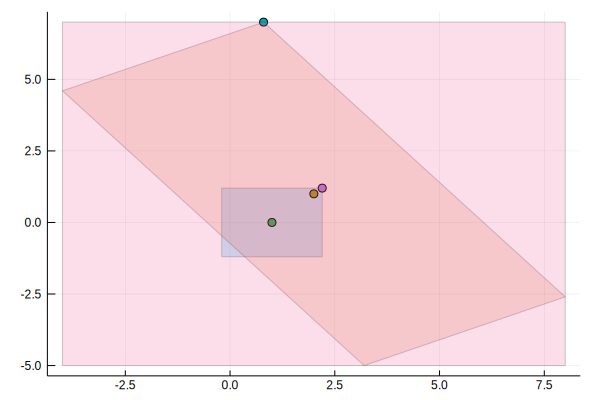

In [116]:
B = BallInf([1.0, 0.0], 1.2)
M = [2 -3; 1 4.]

plot(B, alpha=.2)
plot!(M*B, 1e-3, alpha=.2)
plot!(Singleton(B.center))
plot!(Singleton(B.center + fill(B.radius, 2)))
plot!(Singleton(M*B.center))
plot!(Singleton(M*(B.center + fill(B.radius, 2))))
plot!(Hyperrectangle(M*B.center, abs.(M)*fill(B.radius, 2)), 1e-3, alpha=.2)

In [117]:
vertices_list(B)

4-element Array{Array{Float64,1},1}:
 [2.2, 1.2]  
 [-0.2, 1.2] 
 [2.2, -1.2] 
 [-0.2, -1.2]

In [118]:
I1 = Diagonal([1.0, 1.0])
I2 = Diagonal([-1.0, 1.0])
I3 = Diagonal([1.0, -1.0])
I4 = Diagonal([-1.0, -1.0])
c = B.center
r = radius_hyperrectangle(B)

[c + I1 * r, c + I2 * r, c + I3 * r, c + I4 * r]

4-element Array{Array{Float64,1},1}:
 [2.2, 1.2]  
 [-0.2, 1.2] 
 [2.2, -1.2] 
 [-0.2, -1.2]

In [119]:
[M*c + M*Ik*r for Ik in [I1, I2, I3, I4]]

4-element Array{Array{Float64,1},1}:
 [0.8, 7.0] 
 [-4.0, 4.6]
 [8.0, -2.6]
 [3.2, -5.0]

In [120]:
vertices_list(M*B)

4-element Array{Array{Float64,1},1}:
 [0.8, 7.0] 
 [-4.0, 4.6]
 [8.0, -2.6]
 [3.2, -5.0]

In [121]:
[M*Ik*r for Ik in [I1, I2, I3, I4]]

4-element Array{Array{Float64,1},1}:
 [-1.2, 6.0]
 [-6.0, 3.6]
 [6.0, -3.6]
 [1.2, -6.0]

In [122]:
[Ik*abs.(M)*r for Ik in [I1, I2, I3, I4]]

4-element Array{Array{Float64,1},1}:
 [6.0, 6.0]  
 [-6.0, 6.0] 
 [6.0, -6.0] 
 [-6.0, -6.0]

In [123]:
[Ik*abs.(M) for Ik in [I1, I2, I3, I4]] # multiplying Ik from the left 

4-element Array{Array{Float64,2},1}:
 [2.0 3.0; 1.0 4.0]    
 [-2.0 -3.0; 1.0 4.0]  
 [2.0 3.0; -1.0 -4.0]  
 [-2.0 -3.0; -1.0 -4.0]

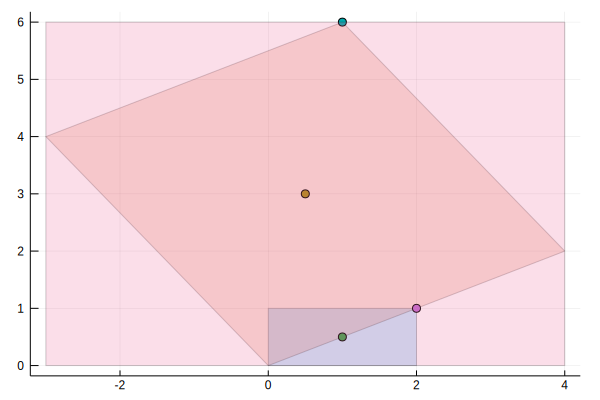

In [130]:
# hyperrectangular case
H = Hyperrectangle(low=[0.0, 0.0], high=[2.0, 1.0])
M = [2 -3; 1 4.]

plot(H, alpha=.2)
plot!(M*H, 1e-3, alpha=.2)
plot!(Singleton(H.center))
plot!(Singleton(H.center + H.radius))
plot!(Singleton(M*H.center))
plot!(Singleton(M*(H.center + H.radius)))
plot!(Hyperrectangle(M*H.center, abs.(M)*H.radius), 1e-3, alpha=.2)

In [131]:
c = H.center
r = radius_hyperrectangle(H)

[c + I1 * r, c + I2 * r, c + I3 * r, c + I4 * r]

4-element Array{Array{Float64,1},1}:
 [2.0, 1.0]
 [0.0, 1.0]
 [2.0, 0.0]
 [0.0, 0.0]

In [132]:
[M*c + M*Ik*r for Ik in [I1, I2, I3, I4]]

4-element Array{Array{Float64,1},1}:
 [1.0, 6.0] 
 [-3.0, 4.0]
 [4.0, 2.0] 
 [0.0, 0.0] 

In [134]:
vertices_list(M*H)

4-element Array{Array{Float64,1},1}:
 [1.0, 6.0] 
 [-3.0, 4.0]
 [4.0, 2.0] 
 [0.0, 0.0] 

In [135]:
[M*Ik*r for Ik in [I1, I2, I3, I4]]

4-element Array{Array{Float64,1},1}:
 [0.5, 3.0]  
 [-3.5, 1.0] 
 [3.5, -1.0] 
 [-0.5, -3.0]

In [136]:
[Ik*abs.(M)*r for Ik in [I1, I2, I3, I4]]

4-element Array{Array{Float64,1},1}:
 [3.5, 3.0]  
 [-3.5, 3.0] 
 [3.5, -3.0] 
 [-3.5, -3.0]

## Benchmark

In [ ]:
function overapproximate_linear_map(lm::LinearMap{N, <:AbstractHyperrectangle{N}}, ::Type{Hyperrectangle}) where {N}
    center_MX = lm.M * LazySets.center(lm.X)
    radius_MX = abs.(lm.M) * radius_hyperrectangle(lm.X)
    return Hyperrectangle(center_MX, radius_MX)
end

In [35]:
using LazySets.Approximations

In [103]:
M = rand(10, 10)
B = rand(Hyperrectangle, dim=10)
L = M*B

@btime overapproximate($L, Hyperrectangle)

  5.192 μs (44 allocations: 6.75 KiB)


Hyperrectangle{Float64}([-2.79468, -1.44889, -1.45802, 0.547756, -0.611857, -0.643647, -0.0104735, -2.87309, -1.33608, -1.18169], [5.07839, 3.49095, 4.81009, 5.01917, 3.82592, 5.68299, 5.98775, 5.74257, 4.22491, 5.11226])

In [104]:
@btime overapproximate_linear_map($L, Hyperrectangle)

  447.045 ns (4 allocations: 1.22 KiB)


Hyperrectangle{Float64}([-2.79468, -1.44889, -1.45802, 0.547756, -0.611857, -0.643647, -0.0104735, -2.87309, -1.33608, -1.18169], [5.07839, 3.49095, 4.81009, 5.01917, 3.82592, 5.68299, 5.98775, 5.74257, 4.22491, 5.11226])

In [109]:
5.192e-6 / 447e-9

11.615212527964204

In [110]:
(@elapsed overapproximate(L, Hyperrectangle)) / (@elapsed overapproximate_linear_map(L, Hyperrectangle))

5.676074972436604

In [111]:
norm(overapproximate_linear_map(L, Hyperrectangle).radius - overapproximate(L, Hyperrectangle).radius)

1.6616296724220897e-15

In [112]:
norm(overapproximate_linear_map(L, Hyperrectangle).center - overapproximate(L, Hyperrectangle).center)

1.4770556661825108e-15